### Homework 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv("data_h4_3337.csv")
data_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Q1. Would we approach this as a supervised or unsupervised learning task and why?**

Answer: This would be a unsupervised learning task as based on the problem statment and the dataset there is no predicted label for outcome provided in the dataset. Given the absence of a target variable the approach to take would be more on clustering and grouping. So this is a unsupervised learning task.

In [3]:
data_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
unique_count = data_df.nunique()
print(unique_count)

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


**How many observations are there in total?**
There are a total of 200 entries in the data set with 5 attributes as shown in data_df.info() output.

**Are there any missing values?**
There are no missing values as there are all 200 non-null enteries as shown by .info() output.

**How many unique values are in each column?**
There are 200 unique customer ID, 2 unique values in gender column, 51 unique age values, 64 different annual income values, and 84 unique spending score as shown above, computed using .nunique() function.

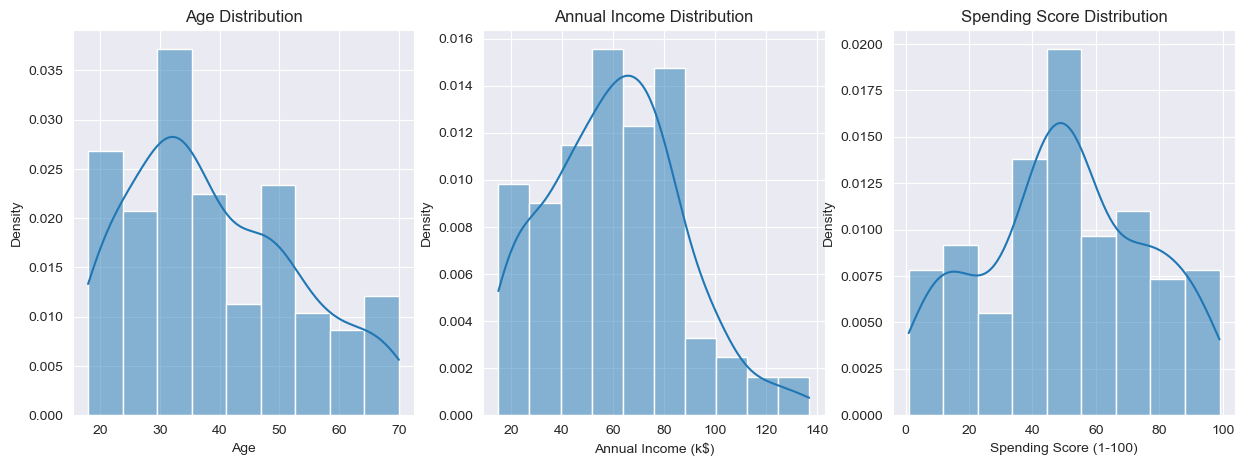

In [6]:
fig, axes = plt.subplots(nrows=1, ncols =3)

sns.histplot(data_df['Age'], kde=True, stat='density', ax=axes[0])
axes[0].set(title='Age Distribution')

sns.histplot(data_df['Annual Income (k$)'], kde=True, stat='density', ax=axes[1])
axes[1].set(title='Annual Income Distribution')

sns.histplot(data_df['Spending Score (1-100)'], kde=True, stat='density', ax=axes[2])
axes[2].set(title='Spending Score Distribution')

plt.show()

**What can you conclude from the plots you created? Are there any interesting findings?**

Answer: Based on the plots above, for the age distribution histogram we can see that the data is right skewed. The distribution of annual incom is high when it is below 100K. Much of the data sees a steep decline in the number of datapoints that have annual income higher than 100K. The Spending score sees a more of a bell curve with normal distribution. There is a peak in the center, but symmetrical probability with the data points around the peak.

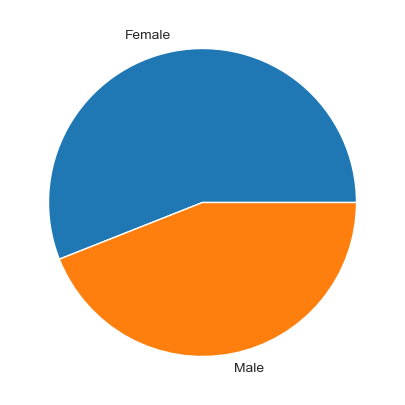

In [7]:
plt.pie(data_df['Gender'].value_counts(), labels = data_df['Gender'].value_counts().index)
plt.show()

**What can you conclude from the plot you created?**
There appears to be slightly more females than males in the dataset making the data unbalanced distribution.

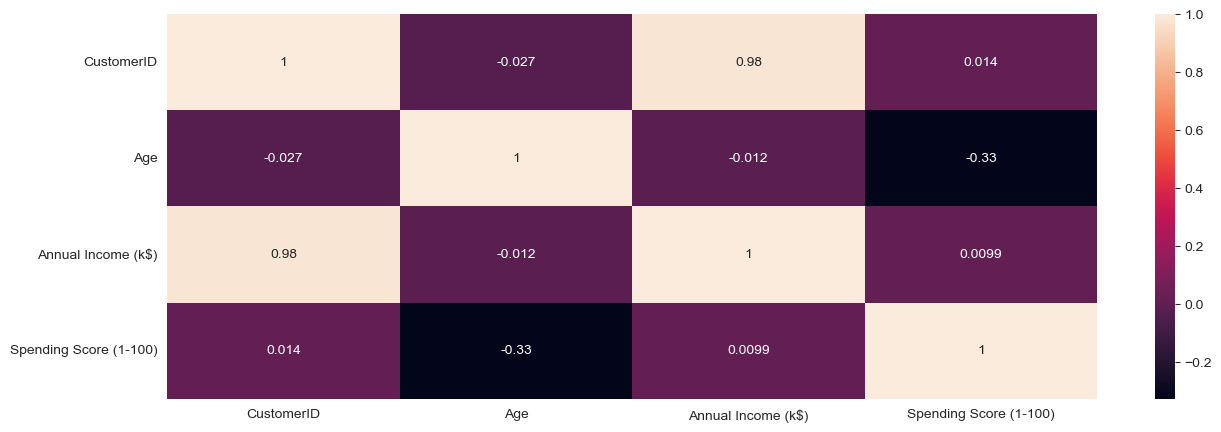

In [8]:
selected_data = data_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(selected_data.corr(), annot=True)
plt.show()

**After creating your heatmap, is there anything interesting? For example, any significant multicollinearity?**

Answer: Interesting finidng is that CustomerID and Annual Income has a correlation value of 0.98  which is very high and can mean multicollinearity but CustomerID is not really a meaningful attribute apart form being useful for clear data storage and managment. This means the data is sorted in some way that makes it such that the higher the CustomerID than higher Annual Income. There is a negative correlation relationship with Age and Spending Score with -0.33. Overall there is no multicollinearity.

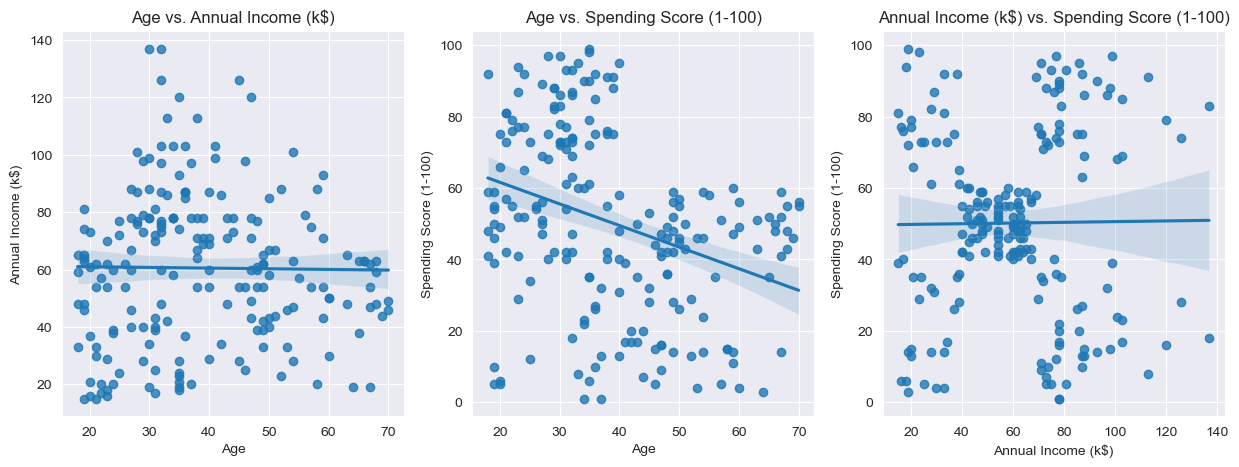

In [9]:
fig, axes = plt.subplots(nrows=1, ncols =3)
sns.regplot(x=data_df['Age'], y=data_df['Annual Income (k$)'], ax=axes[0])
axes[0].set(title='Age vs. Annual Income (k$)')

sns.regplot(x=data_df['Age'], y=data_df['Spending Score (1-100)'], ax=axes[1])
axes[1].set(title='Age vs. Spending Score (1-100)')

sns.regplot(x=data_df['Annual Income (k$)'], y=data_df['Spending Score (1-100)'], ax=axes[2])
axes[2].set(title='Annual Income (k$) vs. Spending Score (1-100)')

plt.show()

**What can you conclude from the plots you created? Are there any interesting findings?**

Answer: According to the regression plots above, the age vs. annual income plot and annual incom vs Spending score have a flatten slope meaning that there is not much relation. However, Age and spending score shows a decreasing slope, meaning that there is a negative correlation between these two features. As Age increases, the spending score decreases. So Age could be a factor used in predicting the spending score.

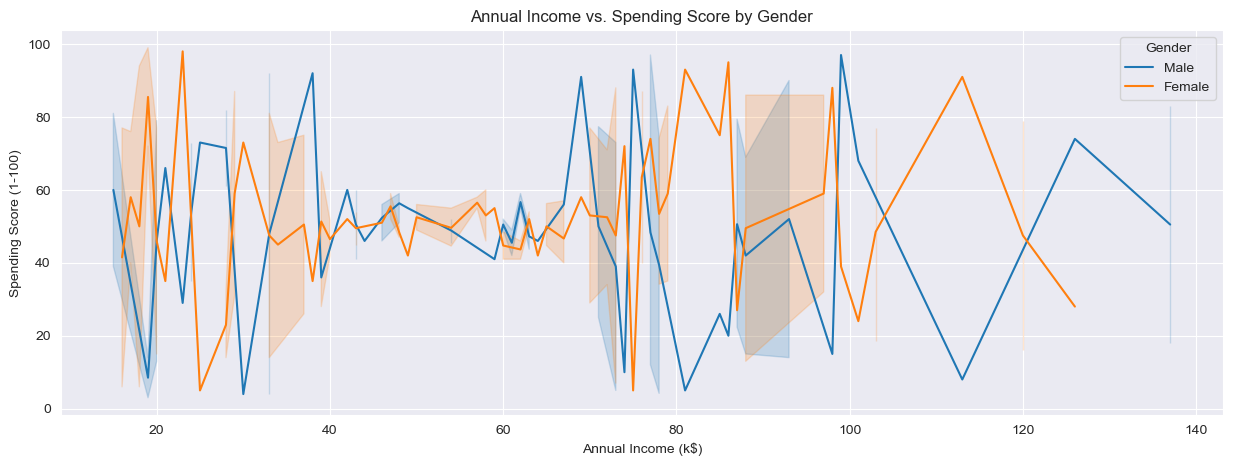

In [10]:
sns.lineplot(data=data_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Annual Income vs. Spending Score by Gender')
plt.show()

**What can you say about the plot created?**
The relationshop between these two variables seems to have no strong liner trend across as it fluctuates across the income levels abd by gender. But seems to be noticable variations between genders, the spending behavious at certain income levels are in complete opposite directions depending on gender. Overall there seems to be other factors like age that can also influence the spending habits. I also created a line graph for age vs spending score and saw a much overlap with both genders.

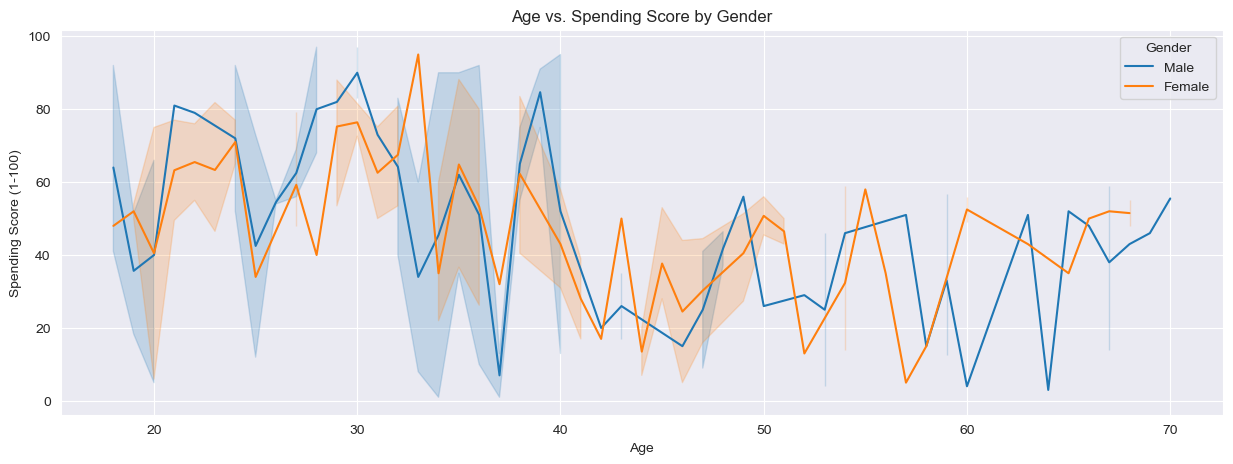

In [11]:
sns.lineplot(data=data_df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs. Spending Score by Gender')
plt.show()

I created the above Age vs. Spending Score line graph to see if there is an influence as the Annual income vs spending score line graph did not show much clear trend. It also contained noise that distorted the plot to not show not much correlation. 

### K-Means Clustering

In [35]:
from sklearn.preprocessing import StandardScaler, normalize

# Saving only Spending_Score and income values into X.
X = data_df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

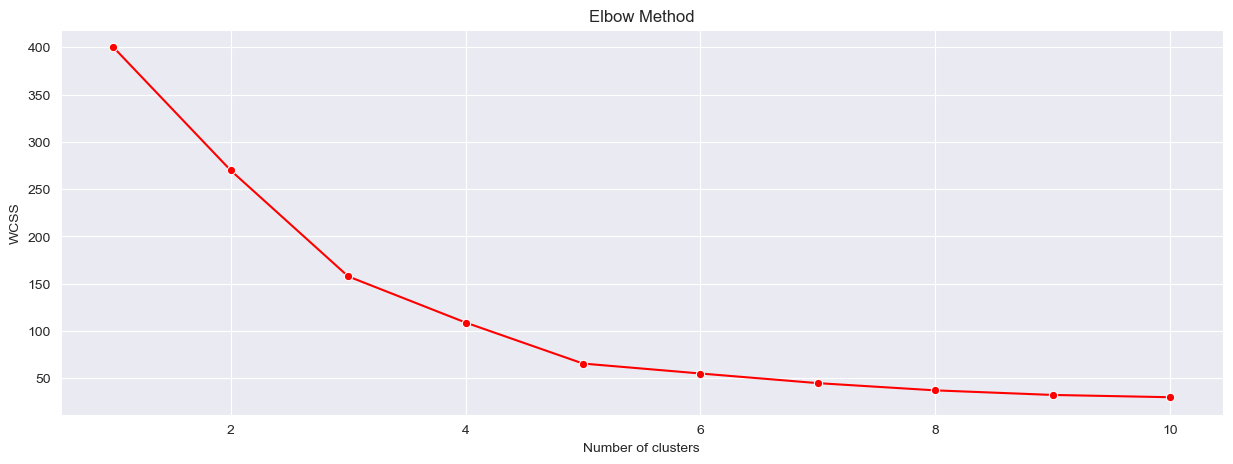

In [22]:
#using elbow method to find the optimal number of k
from sklearn.cluster import KMeans
# store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_scaled)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Above I used the elbow method to find the optimal number of clusters and I alos visually plotted them on the graph above. Based on the graph, the optimal number of clusters is 5. Now I will create a kmeans model using the optimal number of clusters I found, which is 5. I also scaled my data.

In [24]:
#create Kmeans model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X_scaled)

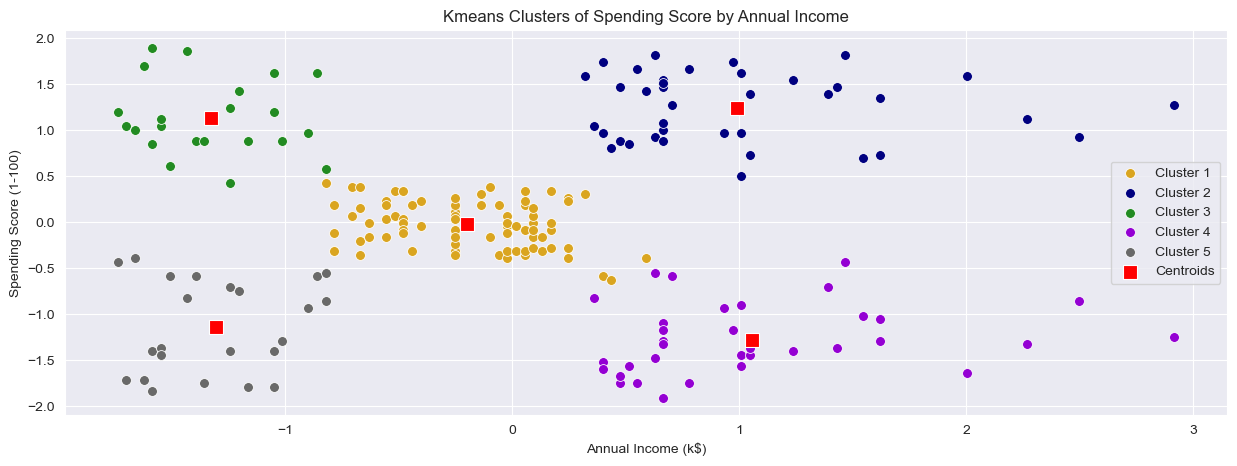

In [25]:
#visualize the clusters
sns.scatterplot(x=X_scaled[y_pred == 0, 0], y=X_scaled[y_pred == 0, 1], color = 'goldenrod', label = 'Cluster 1',s=50)
sns.scatterplot(x=X_scaled[y_pred == 1, 0], y=X_scaled[y_pred == 1, 1], color = 'navy', label = 'Cluster 2',s=50)
sns.scatterplot(x=X_scaled[y_pred == 2, 0], y=X_scaled[y_pred == 2, 1], color = 'forestgreen', label = 'Cluster 3',s=50)
sns.scatterplot(x=X_scaled[y_pred == 3, 0], y=X_scaled[y_pred == 3, 1], color = 'darkviolet', label = 'Cluster 4',s=50)
sns.scatterplot(x=X_scaled[y_pred == 4, 0], y=X_scaled[y_pred == 4, 1], color = 'dimgrey', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Kmeans Clusters of Spending Score by Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Hierarchical Clustering

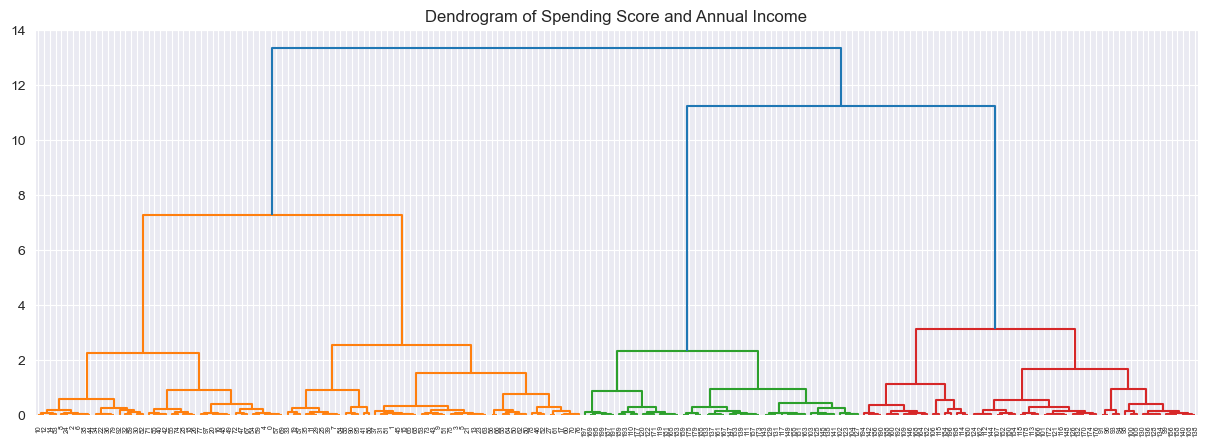

In [36]:
#Create a Dendrogram to find optimal number of clusters using 'ward'
import scipy.cluster.hierarchy as shc

#using scaled data and now normalize the data
normalized_df = normalize(X_scaled) 
normalized_df = pd.DataFrame(data=normalized_df)

plt.title('Dendrogram of Spending Score and Annual Income') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_df, method ='ward'))) 

plt.show()

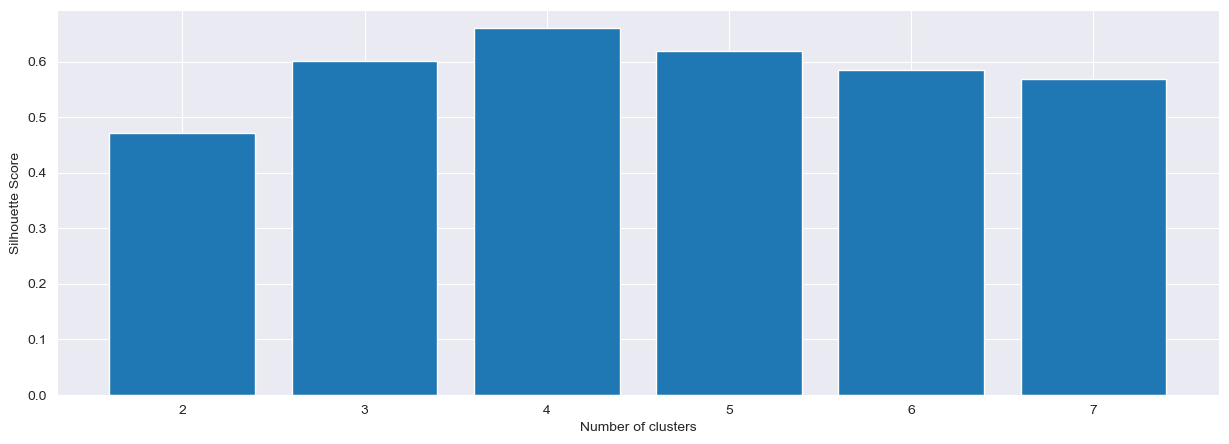

In [43]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(normalized_df,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
plt.bar(x=range(2, 8), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

I also used silhouette scores too and found that the optimal number of clusters in 4. I have also created a line graph of the silhouette score and 4 is the optimal number.

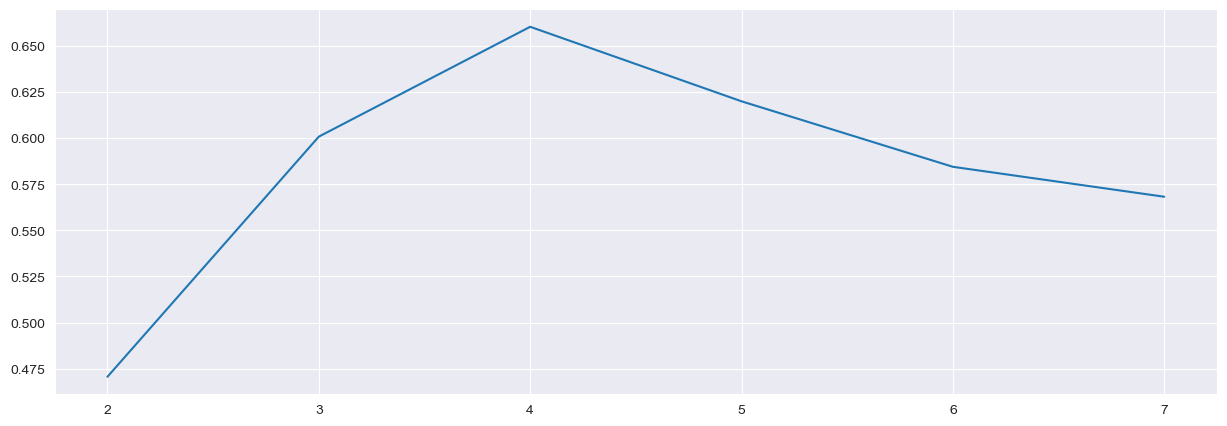

In [41]:
sns.lineplot(x=range(2,8), y=silhouette_scores)
plt.show()

In [39]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(normalized_df)

AgglomerativeClustering(n_clusters=4)

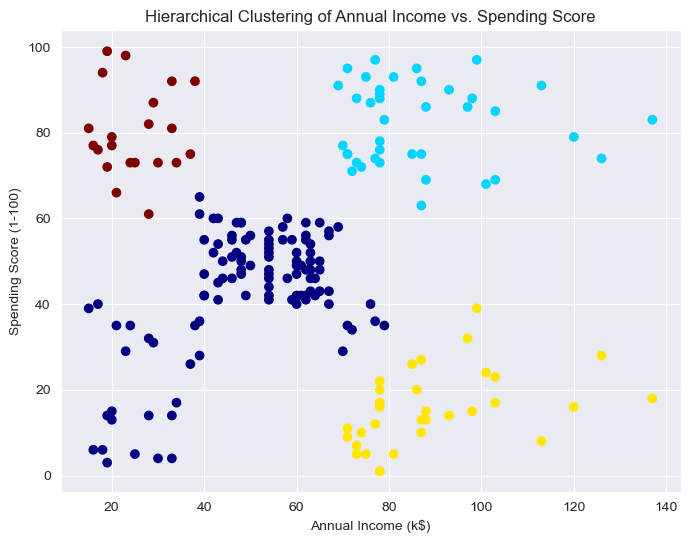

In [58]:
plt.figure(figsize=(8, 6))
plt.title('Hierarchical Clustering of Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Visualizing the clustering 
plt.scatter(data_df['Annual Income (k$)'], data_df['Spending Score (1-100)'],
            c = AgglomerativeClustering(n_clusters = 4).fit_predict(X_scaled), cmap='jet') 
plt.show() 


### Conclusion
Summarizing my results and how k-means and hierarchical clustering differed:

I performed K-means clustering and Hierarchical clustering on the given dataset. I perforemd scaling before I used the elbow method to find the optiomal K, the number of clusters. The visual graph showed that 5 is the optimal number of clusters of K-Means. For Hierarchical clustering, I scaled and normalized the data before creating a Dendrogram. Based on the dendrogram and the bar and line graphs I produced based on the silhouette scores. They showed that the optimal number of clusters is 4. This number is different from K-means cluster optimal K. These two methods used the same featurs 'Annual Income' and 'Spending Score' but had slightly different scores. I did not perform PCA for  Hierarchical clustering because we are only using two features from the dataset so I find no reason to reduce the dimenasionalisty further. 

K-means and Hierarchical clustering have their own advantages and disadvantages. For K-means clustering, we had to determine the optimal number of clusters or optimal K by performing the elbow method and initialize the centroids randomly. K-means is more scalable and faster for larger datasets and the clusters are relatively well separated. Though it has it disadvances such as requiring to per-specify K or the number of clusters, it sensitive to outlier and is influenced by the initial position of centroids. As for hierarchical clustering, I scaled and normalized the data and created the dendrogram using 'ward' method to visualize how data points merge into clusters. It did not require to pre-define the number of clusters. I also calculated the silhouette score and also visualed them using a bar and line graph. This method is computationally intensive. Some advantages are that it does not require us to specify the number of clusters, produces a dendrogram to visualize clustering process, and can help find patters. Some disadvantages are it is computationally expensive for large datasets and is less flexible.

Some examples of where hierarchical clustering can be used is social network analysis, anomaly detection, and gene expression analysis. As for k-means clustering, it can be used in customer segmentation, market analysis, and image compression. Overall, based on comparing the results produced by both clustering methods on the given dataset, K-means clustering worked the best in classifying the annual income and spending score of customers. 
